In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file = "../Clean_LA_Crime.csv"
la_df = pd.read_csv(file)

In [6]:
cleaned_la = la_df.loc[
    (la_df["Crm Cd Desc"] == "RAPE, ATTEMPTED") |
    (la_df["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT") |
    (la_df["Crm Cd Desc"] == "BATTERY - SIMPLE ASSAULT") |
    (la_df["Crm Cd Desc"] == "INTIMATE PARTNER - AGGRAVATED ASSAULT") |
    (la_df["Crm Cd Desc"] == "INTIMATE PARTNER - SIMPLE ASSAULT") |
    (la_df["Crm Cd Desc"] == "RAPE, FORCIBLE") |
    (la_df["Crm Cd Desc"] == "BRANDISH WEAPON") |
    (la_df["Crm Cd Desc"] == "THROWING OBJECT AT MOVING VEHICLE") |
    (la_df["Crm Cd Desc"] == "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT") |
    (la_df["Crm Cd Desc"] == "SHOTS FIRED AT INHABITED DWELLING") |
    (la_df["Crm Cd Desc"] == "CRIMINAL HOMICIDE") |
    (la_df["Crm Cd Desc"] == "BATTERY WITH SEXUAL CONTACT") |
    (la_df["Crm Cd Desc"] == "BATTERY POLICE (SIMPLE)") |
    (la_df["Crm Cd Desc"] == "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT") |
    (la_df["Crm Cd Desc"] == "OTHER ASSAULT") |
    (la_df["Crm Cd Desc"] == "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER") |
    (la_df["Crm Cd Desc"] == "DISCHARGE FIREARMS/SHOTS FIRED") |
    (la_df["Crm Cd Desc"] == "CHILD STEALING") |
    (la_df["Crm Cd Desc"] == "BATTERY ON A FIREFIGHTER") |
    (la_df["Crm Cd Desc"] == "LYNCHING") |
    (la_df["Crm Cd Desc"] == "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT") |
    (la_df["Crm Cd Desc"] == "LYNCHING - ATTEMPTED") |
    (la_df["Crm Cd Desc"] == "MANSLAUGHTER, NEGLIGENT")
]

cleaned_la.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LAT,LON
4,1/2/2010,2100,1,Central,"RAPE, ATTEMPTED",47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0387,-118.2488
7,1/8/2010,2100,1,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,M,B,OTHER PREMISE,UNKNOWN WEAPON/OTHER WEAPON,Adult Arrest,34.0435,-118.2427
8,1/9/2010,230,1,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",30,M,H,PARKING LOT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0450,-118.2640
10,1/14/2010,1445,1,Central,BATTERY - SIMPLE ASSAULT,38,F,B,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0640,-118.2375
18,1/23/2010,2000,1,Central,INTIMATE PARTNER - AGGRAVATED ASSAULT,18,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,34.0545,-118.2499


In [7]:
date_conversion = cleaned_la[["DATE OCC", "Crm Cd Desc"]]
date_conversion

,DATE OCC,Crm Cd Desc
4,1/2/2010,"RAPE, ATTEMPTED"
7,1/8/2010,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
8,1/9/2010,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
10,1/14/2010,BATTERY - SIMPLE ASSAULT
18,1/23/2010,INTIMATE PARTNER - AGGRAVATED ASSAULT
...,...,...
1048552,5/24/2015,BATTERY - SIMPLE ASSAULT
1048558,5/9/2015,INTIMATE PARTNER - SIMPLE ASSAULT
1048561,5/1/2015,INTIMATE PARTNER - SIMPLE ASSAULT
1048562,10/1/2015,BATTERY - SIMPLE ASSAULT


In [8]:
la_df_clean = pd.to_datetime(date_conversion["DATE OCC"])
la_df_clean = pd.DataFrame(la_df_clean)
la_df_clean

,DATE OCC
4,2010-01-02
7,2010-01-08
8,2010-01-09
10,2010-01-14
18,2010-01-23
...,...
1048552,2015-05-24
1048558,2015-05-09
1048561,2015-05-01
1048562,2015-10-01


In [9]:
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2015, 12, 31)
fifteen = (la_df_clean['DATE OCC'] > start_date) & (la_df_clean['DATE OCC'] <= end_date)
fifteen_df = la_df_clean.loc[fifteen]
print(fifteen_df)

          DATE OCC
998234  2015-01-21
998240  2015-10-15
998245  2015-07-08
998248  2015-03-30
998253  2015-01-03
...            ...
1048552 2015-05-24
1048558 2015-05-09
1048561 2015-05-01
1048562 2015-10-01
1048566 2015-12-27

[11640 rows x 1 columns]


In [10]:
jan_1 = []
feb_1 = []
mar_1 = []
apr_1 = []
may_1 = []
jun_1 = []
jul_1 = []
aug_1 = []
sep_1 = []
oct_1 = []
nov_1 = []
dec_1 = []

In [11]:
for date in fifteen_df["DATE OCC"]:
    if (date > datetime.datetime(2015, 1, 1)) & (date < datetime.datetime(2015, 1, 31)):
        jan_1.append(date)
    elif (date > datetime.datetime(2015, 2, 1)) & (date < datetime.datetime(2015, 2, 28)):
            feb_1.append(date)
    elif (date > datetime.datetime(2015, 3, 1)) & (date < datetime.datetime(2015, 3, 31)):
            mar_1.append(date)
    elif (date > datetime.datetime(2015, 4, 1)) & (date < datetime.datetime(2015, 4, 30)):
            apr_1.append(date)
    elif (date > datetime.datetime(2015, 5, 1)) & (date < datetime.datetime(2015, 5, 31)):
            may_1.append(date)
    elif (date > datetime.datetime(2015, 6, 1)) & (date < datetime.datetime(2015, 6, 30)):
            jun_1.append(date)
    elif (date > datetime.datetime(2015, 7, 1)) & (date < datetime.datetime(2015, 7, 31)):
            jul_1.append(date)
    elif (date > datetime.datetime(2015, 8, 1)) & (date < datetime.datetime(2015, 8, 31)):
            aug_1.append(date)
    elif (date > datetime.datetime(2015, 9, 1)) & (date < datetime.datetime(2015, 9, 30)):
            sep_1.append(date)
    elif (date > datetime.datetime(2015, 10, 1)) & (date < datetime.datetime(2015, 10, 31)):
            oct_1.append(date)
    elif (date > datetime.datetime(2015, 11, 1)) & (date < datetime.datetime(2015, 11, 30)):
            nov_1.append(date)
    elif (date > datetime.datetime(2015, 12, 1)) & (date < datetime.datetime(2015, 12, 31)):
            dec_1.append(date)

In [12]:
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2014, 12, 31)
fourteen = (la_df_clean['DATE OCC'] > start_date) & (la_df_clean['DATE OCC'] <= end_date)
fourteen_df = la_df_clean.loc[fourteen]
print(fourteen_df)

         DATE OCC
803054 2014-08-25
803056 2014-01-03
803057 2014-05-24
803062 2014-10-12
803074 2014-08-07
...           ...
998204 2014-04-12
998210 2014-01-25
998211 2014-08-06
998219 2014-05-07
998230 2014-12-28

[45038 rows x 1 columns]


In [13]:
jan_2 = []
feb_2 = []
mar_2 = []
apr_2 = []
may_2 = []
jun_2 = []
jul_2 = []
aug_2 = []
sep_2 = []
oct_2 = []
nov_2 = []
dec_2 = []

In [14]:
for date in fourteen_df["DATE OCC"]:
    if (date > datetime.datetime(2014, 1, 1)) & (date < datetime.datetime(2014, 1, 31)):
        jan_2.append(date)
    elif (date > datetime.datetime(2014, 2, 1)) & (date < datetime.datetime(2014, 2, 28)):
            feb_2.append(date)
    elif (date > datetime.datetime(2014, 3, 1)) & (date < datetime.datetime(2014, 3, 31)):
            mar_2.append(date)
    elif (date > datetime.datetime(2014, 4, 1)) & (date < datetime.datetime(2014, 4, 30)):
            apr_2.append(date)
    elif (date > datetime.datetime(2014, 5, 1)) & (date < datetime.datetime(2014, 5, 31)):
            may_2.append(date)
    elif (date > datetime.datetime(2014, 6, 1)) & (date < datetime.datetime(2014, 6, 30)):
            jun_2.append(date)
    elif (date > datetime.datetime(2014, 7, 1)) & (date < datetime.datetime(2014, 7, 31)):
            jul_2.append(date)
    elif (date > datetime.datetime(2014, 8, 1)) & (date < datetime.datetime(2014, 8, 31)):
            aug_2.append(date)
    elif (date > datetime.datetime(2014, 9, 1)) & (date < datetime.datetime(2014, 9, 30)):
            sep_2.append(date)
    elif (date > datetime.datetime(2014, 10, 1)) & (date < datetime.datetime(2014, 10, 31)):
            oct_2.append(date)
    elif (date > datetime.datetime(2014, 11, 1)) & (date < datetime.datetime(2014, 11, 30)):
            nov_2.append(date)
    elif (date > datetime.datetime(2014, 12, 1)) & (date < datetime.datetime(2014, 12, 31)):
            dec_2.append(date)

In [15]:
start_date = datetime.datetime(2013, 1, 1)
end_date = datetime.datetime(2013, 12, 31)
thirteen = (la_df_clean['DATE OCC'] > start_date) & (la_df_clean['DATE OCC'] <= end_date)
thirteen_df = la_df_clean.loc[thirteen]
print(thirteen_df)

         DATE OCC
610725 2013-10-26
610728 2013-05-17
610729 2013-05-05
610734 2013-07-12
610737 2013-03-20
...           ...
803040 2013-10-19
803041 2013-10-18
803045 2013-10-28
803050 2013-12-22
803051 2013-08-07

[41120 rows x 1 columns]


In [16]:
jan_3 = []
feb_3 = []
mar_3 = []
apr_3 = []
may_3 = []
jun_3 = []
jul_3 = []
aug_3 = []
sep_3 = []
oct_3 = []
nov_3 = []
dec_3 = []

In [17]:
for date in thirteen_df["DATE OCC"]:
    if (date > datetime.datetime(2013, 1, 1)) & (date < datetime.datetime(2013, 1, 31)):
        jan_3.append(date)
    elif (date > datetime.datetime(2013, 2, 1)) & (date < datetime.datetime(2013, 2, 28)):
            feb_3.append(date)
    elif (date > datetime.datetime(2013, 3, 1)) & (date < datetime.datetime(2013, 3, 31)):
            mar_3.append(date)
    elif (date > datetime.datetime(2013, 4, 1)) & (date < datetime.datetime(2013, 4, 30)):
            apr_3.append(date)
    elif (date > datetime.datetime(2013, 5, 1)) & (date < datetime.datetime(2013, 5, 31)):
            may_3.append(date)
    elif (date > datetime.datetime(2013, 6, 1)) & (date < datetime.datetime(2013, 6, 30)):
            jun_3.append(date)
    elif (date > datetime.datetime(2013, 7, 1)) & (date < datetime.datetime(2013, 7, 31)):
            jul_3.append(date)
    elif (date > datetime.datetime(2013, 8, 1)) & (date < datetime.datetime(2013, 8, 31)):
            aug_3.append(date)
    elif (date > datetime.datetime(2013, 9, 1)) & (date < datetime.datetime(2013, 9, 30)):
            sep_3.append(date)
    elif (date > datetime.datetime(2013, 10, 1)) & (date < datetime.datetime(2013, 10, 31)):
            oct_3.append(date)
    elif (date > datetime.datetime(2013, 11, 1)) & (date < datetime.datetime(2013, 11, 30)):
            nov_3.append(date)
    elif (date > datetime.datetime(2013, 12, 1)) & (date < datetime.datetime(2013, 12, 31)):
            dec_3.append(date)

In [18]:
x_axis = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
x_axis

['jan',
 'feb',
 'mar',
 'apr',
 'may',
 'jun',
 'jul',
 'aug',
 'sep',
 'oct',
 'nov',
 'dec']

In [25]:
jan_total = jan_1 + jan_2 + jan_3
feb_total = feb_1 + feb_2 + feb_3
mar_total = mar_1 + mar_2 + mar_3
apr_total = apr_1 + apr_2 + apr_3
may_total = may_1 + may_2 + may_3
jun_total = jun_1 + jun_2 + jun_3
jul_total = jul_1 + jul_2 + jul_3
aug_total = aug_1 + aug_2 + aug_3
sep_total = sep_1 + sep_2 + sep_3
oct_total = oct_1 + oct_2 + oct_3
nov_total = nov_1 + nov_2 + nov_3
dec_total = dec_1 + dec_2 + dec_3

fifteen_months = [len(jan_1), len(feb_1), len(mar_1), len(apr_1), len(may_1), len(jun_1), len(jul_1), len(aug_1), len(sep_1), len(oct_1), len(nov_1), len(dec_1)]

months_total = [len(jan_total), len(feb_total), len(mar_total), len(apr_total), len(may_total), len(jun_total), len(jul_total), len(aug_total), len(sep_total), len(oct_total), len(nov_total), len(dec_total)]

Text(0, 0.5, 'Number of Crimes')

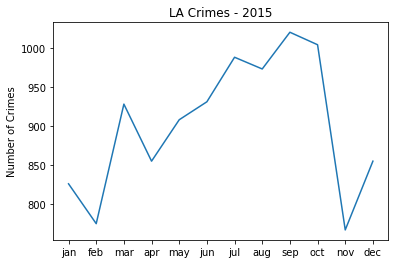

In [27]:
plt.plot(x_axis, fifteen_months)
plt.title("LA Crimes - 2015")
plt.ylabel("Number of Crimes")

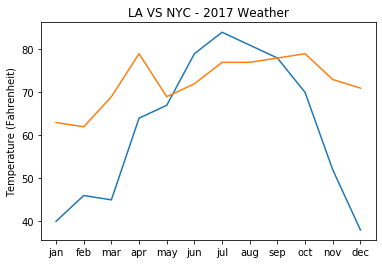

In [21]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
nyc_avg_temp = [40, 46, 45, 64, 67, 79, 84, 81, 78, 70, 52, 38]
la_avg_temp = [63, 62, 69, 79, 69, 72, 77, 77, 78, 79, 73, 71]

plt.plot(months, nyc_avg_temp)
plt.plot(months, la_avg_temp)
plt.title("LA VS NYC - 2017 Weather")
plt.ylabel("Temperature (Fahrenheit)")
plt.show()